In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [192]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

Überblick über die Daten

In [193]:
country = pd.read_csv("https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/clustering/data/country.txt")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650
1,Sudan,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480
2,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
3,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


In [194]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     151 non-null    object 
 1   child_mort  151 non-null    float64
 2   exports     151 non-null    float64
 3   health      151 non-null    float64
 4   imports     151 non-null    float64
 5   income      151 non-null    int64  
 6   inflation   151 non-null    float64
 7   life_expec  151 non-null    float64
 8   total_fer   151 non-null    float64
 9   gdpp        151 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 11.9+ KB


country: Der Name des Landes (Datentyp: object)
child_mort: Die Kindersterblichkeitsrate pro 1000 Geburten (Datentyp: float64)
exports: Der Exportanteil am Bruttoinlandsprodukt (Datentyp: float64)
health: Der Gesundheitsausgabenanteil am Bruttoinlandsprodukt (Datentyp: float64)
imports: Der Importanteil am Bruttoinlandsprodukt (Datentyp: float64)
income: Das Durchschnittseinkommen pro Person (Datentyp: int64)
inflation: Die Inflationsrate (Datentyp: float64)
life_expec: Die Lebenserwartung bei der Geburt (Datentyp: float64)
total_fer: Die durchschnittliche Anzahl der Kinder pro Frau (Datentyp: float64)
gdpp: Das Bruttoinlandsprodukt pro Kopf (Datentyp: int6)

In [195]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,37.905960,40.447013,6.790530,46.351430,17899.423841,7.857536,70.774172,2.934305,13636.324503
std,40.749021,28.196914,2.781353,24.614163,19801.730058,10.973978,9.011529,1.512132,18766.269648
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,7.850000,22.800000,4.850000,29.950000,3850.000000,1.730000,65.450000,1.820000,1485.000000
50%,19.100000,34.800000,6.220000,43.000000,10400.000000,5.140000,73.400000,2.410000,5020.000000
75%,60.400000,50.950000,8.690000,57.500000,26200.000000,10.350000,77.000000,3.750000,16850.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [196]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [197]:
#Da wir die Technik des unüberwachten Lernens verwenden werden,
#brauchen wir die Länderspalte hier nicht, also lassen wir sie weg.
country_df=country.drop(['country'],axis=1)

<AxesSubplot:>

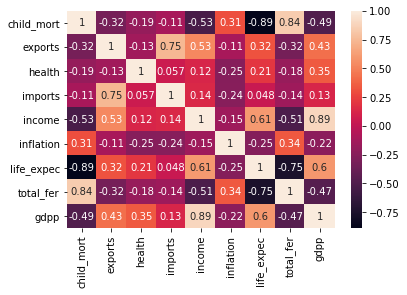

In [198]:
#Korrelationsmatrix 
corr_matrix=country_df.corr()
sns.heatmap(corr_matrix,annot=True)



In diesem Kontext bedeutet das, dass es eine starke positive Korrelation zwischen dem Bruttoinlandsprodukt (BIP) und dem Einkommen, den Importen und Exporten sowie der Kindersterblichkeit (child_mort) und der Gesamtfruchtbarkeitsrate (total_fert) gibt. Das bedeutet, dass diese Variablen tendenziell in die gleiche Richtung variieren.

Wenn das BIP steigt, steigt auch das Einkommen, die Importe und Exporte sowie die Kindersterblichkeit und die Gesamtfruchtbarkeitsrate. Wenn das BIP sinkt, sinken auch diese Variablen.

Auf der anderen Seite gibt es eine starke negative Korrelation zwischen der Lebenserwartung (life_expec) und der Kindersterblichkeit. Das bedeutet, dass diese Variablen dazu neigen, sich in entgegengesetzte Richtungen zu bewegen.

Wenn die Kindersterblichkeit hoch ist, ist die Lebenserwartung in der Regel niedrig. Wenn die Kindersterblichkeit niedrig ist, steigt die Lebenserwartung in der RegeWenn die Kindersterblichkeit niedrig ist, steigt die Lebenserwartung in der Regel.

Diese Korrelationsbeziehungen können auf sozioökonomische Zusammenhänge in einem Land oder einer Region hinweisen. Eine höhere wirtschaftliche Entwicklung (gemessen am BIP und Einkommen) geht oft mit niedrigerer Kindersterblichkeit und niedrigerer Gesamtfruchtbarkeitsrate einher. Gleichzeitig deutet eine höhere Lebenserwartung auf eine bessere Gesundheitsversorgung und Lebensbedingungen hin, was zu einer niedrigeren Kindersterblichkeit führt.


# 1. use K-means clustering and Hierarchical clustering to cluster the country into groups.

Im ersten Schritt muss eine Skalierung durchgweführt werden, da sie für die Algorithem K-means Clustering und Hierarchical Clustering erforderlich ist,weil diese Algorithmen auf Entfernung basieren.
Es wird die StandardScaler-Bibliothek verwendet.
StandardScaler transformiert die Daten so, dass der Mittelwert 0 und die Varianz 1 ist.


In [199]:
scaling=StandardScaler()
scaled=scaling.fit_transform(country_df)

In [200]:
scaled_country=pd.DataFrame(scaled,columns=country_df.columns)

# ausgabe skalirte daten
scaled_country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.290688,0.222499,-0.487182,0.421831,-0.516285,2.865576,-0.509280,-0.195277,-0.587378
1,0.955192,-0.738239,-0.169736,-1.188277,-0.736187,1.073589,-0.498146,1.291005,-0.649931
2,1.294977,-0.627932,-0.072338,-0.466786,-0.854752,0.387880,-1.967811,1.576318,-0.704518
3,-0.822526,1.279311,1.410278,1.155551,1.175543,-0.546514,1.027187,-0.712821,1.644762
4,1.922842,0.023235,0.403831,0.132419,-0.876083,1.183302,-1.477923,2.392446,-0.711201


### K-means Clustering 

K-means Clustering ist ein häufig verwendetes Clustering-Verfahren, das die Beobachtungen in k vordefinierte Cluster einteilt. Um zu entscheiden, wie viele Cluster in Frage kommen, verwenden wir die Ellbogenmethode

C:\Users\elena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

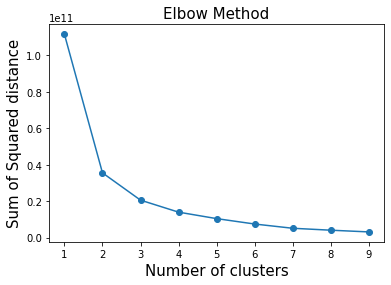

In [201]:
# Ellenbogenkurve zeichnen

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(country_df)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

der Ellbogen liegt bei 3. Also wird 3 als Anzahl der Cluster gewählt

In [202]:
##der Ellbogen liegt bei 3. Also wird 3 als Anzahl der Cluster gewählt
#Auswahl von 3 Klustern
kmeans = KMeans(n_clusters = 3,random_state = 111)
kmeans.fit(scaled_country)

C:\Users\elena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=111)

In [203]:
#Anzahl der Datensätze in den einzelnen Clustern
pd.Series(kmeans.labels_).value_counts()



2    74
1    42
0    35
dtype: int64

In [204]:
#Überprüfung, wie gut unser Modell ist.
#Berechnung des Silhouettenkoeffizienten für K=3

metrics.silhouette_score(scaled_country, kmeans.labels_)

# bei der überprüfung mit 2 klustern wurden schlechteren ergebnisse erziehlt

0.2779707425557981

Der Silhouettenkoeffizient ist 0.2779707425557981, was darauf hindeutet ein dass die Clusterbildung insgesamt akzeptabel ist, aber es möglicherweise Raum für Verbesserungen gibt. 

In [205]:
#Vorhersage

cluster_labels = kmeans.fit_predict(scaled_country)

C:\Users\elena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [206]:
preds = kmeans.labels_
kmeans_country = pd.DataFrame(country)
kmeans_country['KMeans_Clusters'] = preds
kmeans_country.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650,2
1,Sudan,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480,1
2,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,1
3,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400,0
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1
5,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400,0
6,Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.20,1980,2
7,Turkey,19.1,20.4,6.74,25.5,18000,7.01,78.2,2.15,10700,2
8,Georgia,16.5,35.0,10.10,52.8,6730,8.55,72.8,1.92,2960,2
9,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,1


C:\Users\elena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


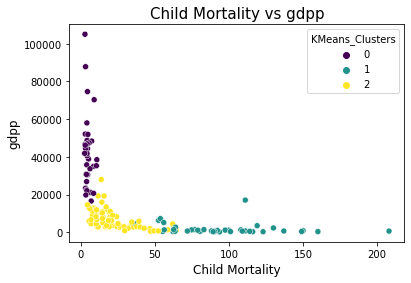

In [207]:
#visulisierung von clustern kindersterblichkeit vs. gdpp
sns.scatterplot(kmeans_country['child_mort'],kmeans_country['gdpp'],hue='KMeans_Clusters',data=kmeans_country,palette='viridis') 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

C:\Users\elena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


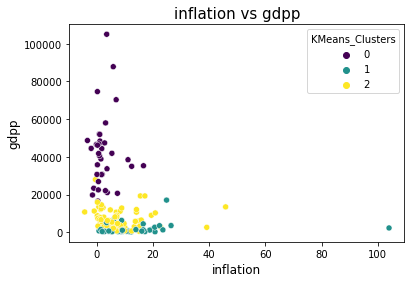

In [208]:
sns.scatterplot(kmeans_country['inflation'],kmeans_country['gdpp'],hue='KMeans_Clusters',data=kmeans_country,palette='viridis') 
plt.title("inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

Aus den obigen Clustern können wir schließen, dass ein Land mit hoher Kindersterblichkeit, niedrigem BIP pro Kopf und niedriger Inflation (die Messung der jährlichen Wachstumsrate des gesamten BIP) ist ein unterentwickeltes Land.
Ein Land mit niedriger Kindersterblichkeit, hohem BIP und hoher Inflation ist ein entwickeltes Land.

Daraus können wir schließen, dass
0 = entwickeltes Land
1 = unterentwickeltes Land
2 = Entwicklungsland

In [209]:
#Anzahl der entwickelten Landes, der Entwicklungslandes, des unterentwickelten Landes finden
under_developing=kmeans_country[kmeans_country['KMeans_Clusters']==1]['country']
developing=kmeans_country[kmeans_country['KMeans_Clusters']==2]['country']
developed=kmeans_country[kmeans_country['KMeans_Clusters']==0]['country']

print("Anzahl der unterentwickelten Länder",len(under_developing))
print("Anzahl der Entwicklungsländer",len(developing))
print("Anzahl der entwickelten Länder",len(developed))

Anzahl der unterentwickelten Länder 42
Anzahl der Entwicklungsländer 74
Anzahl der entwickelten Länder 35


In [210]:
list(developed)

['Belgium',
 'United States',
 'Slovak Republic',
 'Slovenia',
 'United Kingdom',
 'Italy',
 'France',
 'United Arab Emirates',
 'Portugal',
 'Norway',
 'Sweden',
 'New Zealand',
 'Kuwait',
 'Cyprus',
 'Germany',
 'Malta',
 'Ireland',
 'South Korea',
 'Denmark',
 'Greece',
 'Australia',
 'Singapore',
 'Japan',
 'Iceland',
 'Canada',
 'Austria',
 'Luxembourg',
 'Israel',
 'Qatar',
 'Switzerland',
 'Bahrain',
 'Spain',
 'Brunei',
 'Finland',
 'Czech Republic']

In [211]:
list(under_developing)

['Sudan',
 'Malawi',
 'Congo, Dem. Rep.',
 'Lesotho',
 'Burundi',
 'Mauritania',
 'Pakistan',
 'Kenya',
 'Sierra Leone',
 'Timor-Leste',
 'Comoros',
 'Madagascar',
 'Benin',
 'Eritrea',
 'Iraq',
 'Cameroon',
 'Uganda',
 'Botswana',
 'Afghanistan',
 'Haiti',
 'Gambia',
 'Ghana',
 'Rwanda',
 'South Africa',
 'Congo, Rep.',
 'Mozambique',
 'Chad',
 'Guinea',
 'Niger',
 'Angola',
 'Liberia',
 'Yemen',
 'Tanzania',
 'Lao',
 'Namibia',
 'Kiribati',
 'Zambia',
 'Guinea-Bissau',
 'Mali',
 'Central African Republic',
 'Nigeria',
 'Equatorial Guinea']

In [212]:
list(developing)

['Mongolia',
 'Bolivia',
 'Turkey',
 'Georgia',
 'Belize',
 'Belarus',
 'Panama',
 'Indonesia',
 'Morocco',
 'Fiji',
 'Bahamas',
 'Russia',
 'Samoa',
 'China',
 'Iran',
 'Egypt',
 'Tunisia',
 'Hungary',
 'Libya',
 'Lebanon',
 'Jamaica',
 'Paraguay',
 'Brazil',
 'Guatemala',
 'Guyana',
 'Micronesia, Fed. Sts.',
 'Armenia',
 'Bosnia and Herzegovina',
 'Mauritius',
 'Albania',
 'Myanmar',
 'Nepal',
 'Jordan',
 'Peru',
 'Oman',
 'Turkmenistan',
 'Philippines',
 'Thailand',
 'Venezuela',
 'Malaysia',
 'Sri Lanka',
 'Ukraine',
 'Macedonia, FYR',
 'Chile',
 'Saudi Arabia',
 'El Salvador',
 'Cape Verde',
 'Suriname',
 'Vanuatu',
 'Antigua and Barbuda',
 'Seychelles',
 'Croatia',
 'Bangladesh',
 'Grenada',
 'Latvia',
 'India',
 'Kazakhstan',
 'St. Vincent and the Grenadines',
 'Poland',
 'Bulgaria',
 'Tonga',
 'Argentina',
 'Kyrgyz Republic',
 'Bhutan',
 'Ecuador',
 'Tajikistan',
 'Azerbaijan',
 'Uruguay',
 'Estonia',
 'Barbados',
 'Dominican Republic',
 'Costa Rica',
 'Colombia',
 'Montenegro'

Ich möchte mir die Länder mit der höchsten Kindersterblichkeit und dem geringsten BIP anschauen

In [213]:
# Filtern des Datensatzes nach den unterentwickelten Ländern
underdeveloped_countries = country[country['country'].isin(under_developing)]

# das Land mit der höchsten Kindersterblichkeitsrate
highest_child_mortality = underdeveloped_countries['child_mort'].idxmax()
country_highest_child_mortality = underdeveloped_countries.loc[highest_child_mortality, 'country']

# das Land mit dem niedrigsten BIP
lowest_gdpp = underdeveloped_countries['gdpp'].idxmin()
country_lowest_gdpp = underdeveloped_countries.loc[lowest_gdpp, 'country']


# Gib die Ergebnisse aus
print("Land mit der höchsten Kindersterblichkeitsrate:", country_highest_child_mortality)
print("Land mit dem niedrigsten BIP:", country_lowest_gdpp)


Land mit der höchsten Kindersterblichkeitsrate: Haiti
Land mit dem niedrigsten BIP: Burundi


In [214]:
haiti_data = country[country['country'] == 'Haiti']

# Gib die Daten zu Haiti aus
print(haiti_data)

   country  child_mort  exports  health  imports  income  inflation  \
61   Haiti       208.0     15.3    6.91     64.7    1500       5.45   

    life_expec  total_fer  gdpp  KMeans_Clusters  
61        32.1       3.33   662                1  


In [215]:
burundi_data = country[country['country'] == 'Burundi']
# Gib die Daten zu Haiti aus
print(burundi_data)

    country  child_mort  exports  health  imports  income  inflation  \
10  Burundi        93.6     8.92    11.6     39.2     764       12.3   

    life_expec  total_fer  gdpp  KMeans_Clusters  
10        57.7       6.26   231                1  


### Hierarchical Clustering

Beim hierarchischen Clustering werden die Datenpunkte schrittweise zu Clustern zusammengeführt, um eine Hierarchie von Clustern zu erstellen. Es gibt zwei Hauptarten des hierarchischen Clusterings: das agglomerative und das divise Verfahren. Hier wird agglomerative Verfahren verwendet.

Beim agglomerativen hierarchischen Clustering beginnt man mit jedem Datenpunkt als eigenem Cluster und fügt dann schrittweise ähnliche Cluster zusammen, bis alle Datenpunkte zu einem einzigen Cluster zusammengeführt sind. Dabei wird eine bestimmte Ähnlichkeitsmetrik verwendet, wie z.B. die euklidische Distanz, um die Ähnlichkeit zwischen den Clustern zu berechnen.

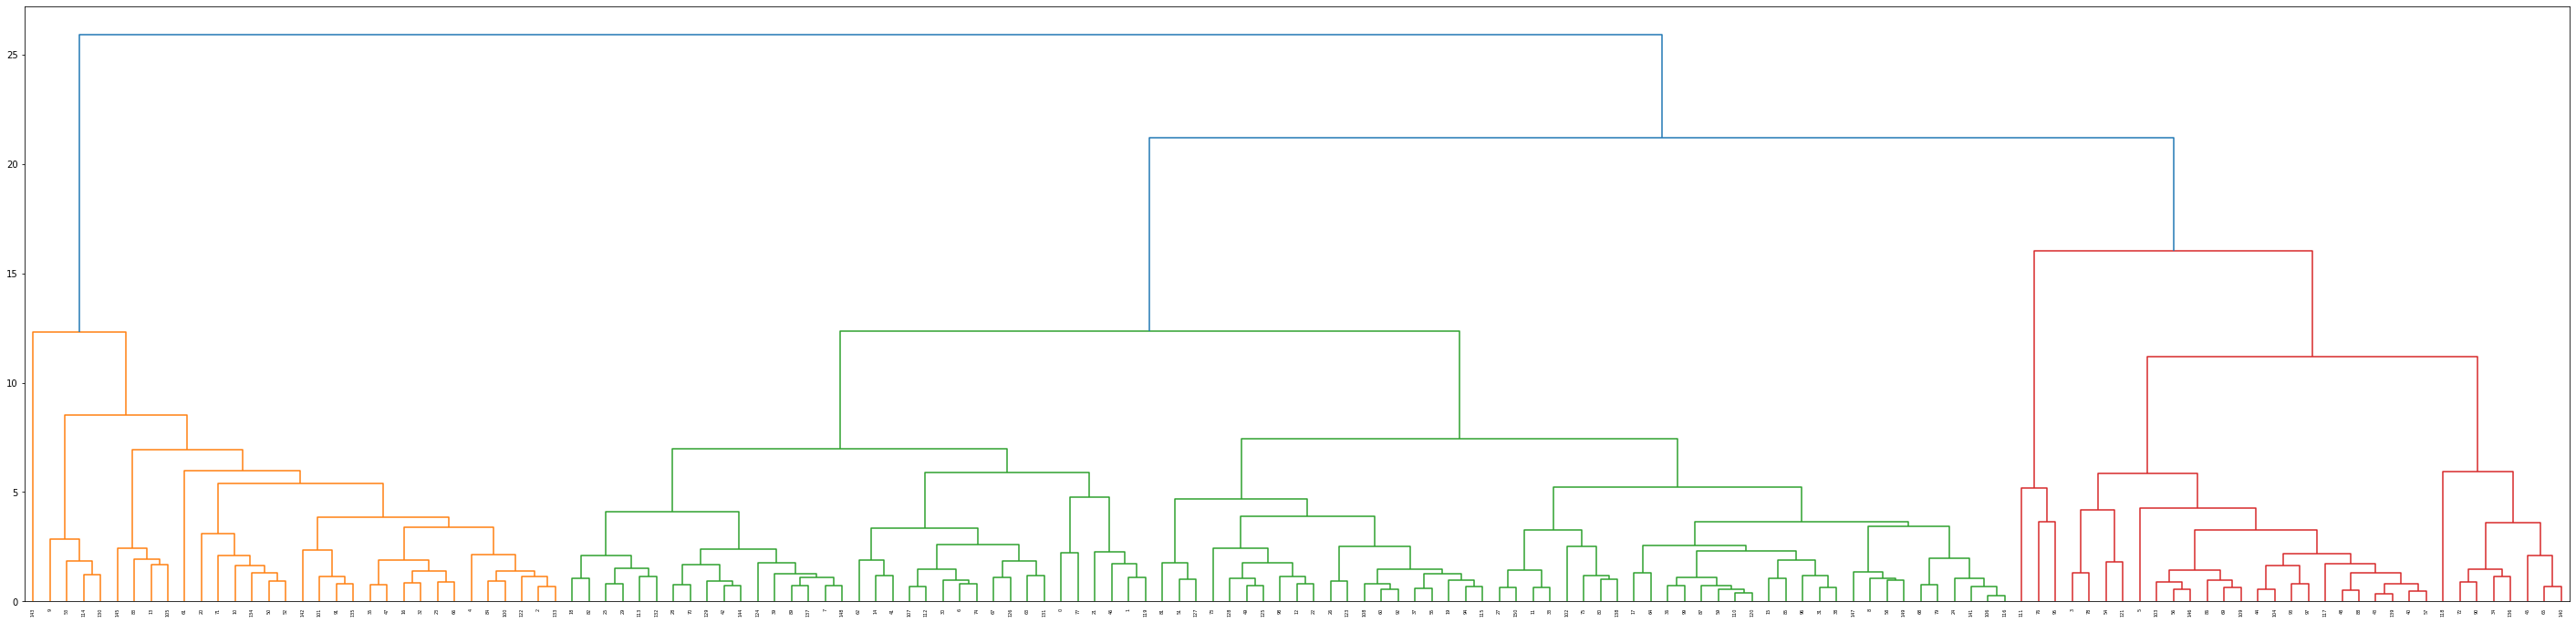

In [216]:
#
#Ein Dendrogramm wird durch hierarchische Clusteranalyse erzeugt und ist eine Art Baumdiagramm, das hierarchische Beziehungen zwischen verschiedenen Datensätzen darstellt.
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(scaled_country,method='ward'))

Aus dem obigen Dendogramm können wir die minimale Anzahl von Clustern als 2 und die maximale Anzahl von Clustern als 5 annehmen.  Wir nehmen 3, da es 3 visuel unterscheidbare Cluster gibt.

In [217]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(scaled_country)
hcluster_label = hcluster.labels_

In [218]:
hcluster_country = pd.DataFrame(country)
#adding hcluster labels in hcluster_df
hcluster_country['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,hcluster
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650,2,2
1,Sudan,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480,1,2
2,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,1,1
3,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400,0,0
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1,1


C:\Users\elena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


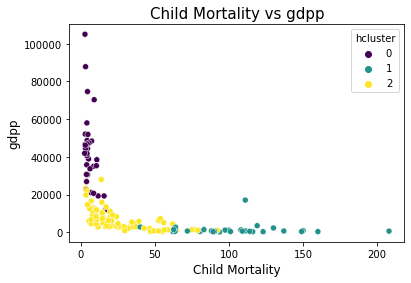

In [219]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(hcluster_country['child_mort'],hcluster_country['gdpp'],hue='hcluster',data=hcluster_country,palette='viridis')
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

C:\Users\elena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


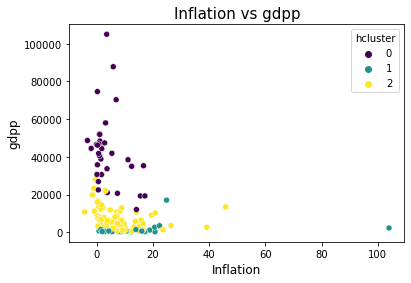

In [220]:
#visulazing hcluster results
sns.scatterplot(hcluster_country['inflation'],hcluster_country['gdpp'],hue='hcluster',data=hcluster_country,palette='viridis')
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()



In [223]:
##Anzahl der entwickelten Landes, der Entwicklungslandes, des unterentwickelten Landes finden
developed=hcluster_country[hcluster_country['hcluster']==0]['country']
developing=hcluster_country[hcluster_country['hcluster']==2]['country']
under_developing=hcluster_country[hcluster_country['hcluster']==1]['country']

print("Number of deveoped countries",len(developed))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(under_developing))



Number of deveoped countries 33
Number of developing countries 86
Number of under-developing countries 32


In [224]:
list(under_developing)

['Malawi',
 'Congo, Dem. Rep.',
 'Lesotho',
 'Burundi',
 'Mauritania',
 'Kenya',
 'Sierra Leone',
 'Comoros',
 'Madagascar',
 'Benin',
 'Cameroon',
 'Uganda',
 'Afghanistan',
 'Micronesia, Fed. Sts.',
 'Haiti',
 'Gambia',
 'Rwanda',
 'Congo, Rep.',
 'Mozambique',
 'Chad',
 'Guinea',
 'Niger',
 'Angola',
 'Liberia',
 'Tanzania',
 'Kiribati',
 'Zambia',
 'Guinea-Bissau',
 'Mali',
 'Central African Republic',
 'Nigeria',
 'Equatorial Guinea']

Bei dem hierarchischen Clustering wurden 32 Länder als unterentwickel eingestufft. Im vergleich dazu waren es bei K-Means 42. Auch bei den anderen Clustergruppen sind die Zuordnungen unterschiedlich ausgefallen.

# 2. use PCA to reduce the dimension to 2d, and visualize the cluster from K-means and Hierarchical clustering respectively

In [225]:
from sklearn.decomposition import PCA

 Es wird eine PCA-Reduktion auf 2 Dimensionen angewendet. Durch die Reduzierung der Daten auf 2 Dimensionen werden die Informationen in den ursprünglichen Variablen auf zwei neue Hauptkomponenten komprimiert. Dies ermöglicht eine einfachere Visualisierung und Interpretation der Daten, da sie auf einer zweidimensionalen Ebene dargestellt werden können.

In [226]:
## Reduziere die Dimension auf 2D mit PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_country)

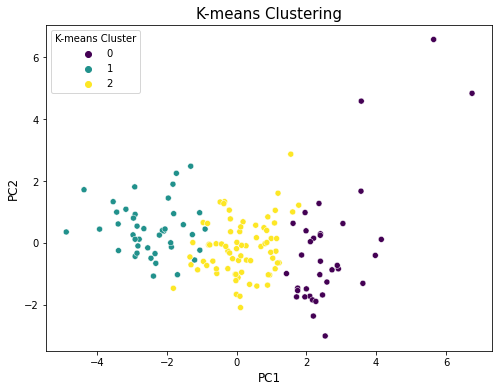

In [227]:
# K-means Clustering
kmeans_labels = kmeans.labels_

# Hierarchical Clustering
hierarchical_labels = hcluster.labels_

# Erstellen einer DataFrame für die reduzierten Daten und die Clusterzugehörigkeiten
df_reduced = pd.DataFrame({'PC1': reduced_data[:, 0], 'PC2': reduced_data[:, 1], 'K-means Cluster': kmeans_labels, 'Hierarchical Cluster': hierarchical_labels})

# Plotten die Cluster von K-means
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='K-means Cluster', data=df_reduced, palette='viridis')
plt.title("K-means Clustering", fontsize=15)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.show()


Bei der visualisierten Darstellung kann mann erkennen, dass manche Punkte sich überlappen,insbesondere zwischen cluster 1 und cluster 2,das bedeutet, dass diese Punkte ähnliche Merkmale oder Eigenschaften aufweisen, die sie für das Clustering ähnlich machen. Die Überlappung der Punkte kann darauf hinweisen, dass es Bereiche gibt, in denen die Zuordnung zu einem bestimmten Cluster unsicher ist oder dass es Datenpunkte gibt, die mehreren Clustern ähnlich sind. Außerdem sind beim cluster 0 einige Punkte zu sehen , die im Raum deutlich von ihrem eigentlichen Cluster entfernt sind. Dies kann auf Ausreißer oder Anomalien hinweisen.

In [228]:
cluster_countries = pd.DataFrame({'country': country['country'], 'K-means Cluster': kmeans_labels})

# Länder im K-means Cluster 1 anzeigen
cluster_1_countries = cluster_countries[cluster_countries['K-means Cluster'] == 1]['country']
print("Länder im K-means Cluster 1:")
print(cluster_1_countries)

Länder im K-means Cluster 1:
1                         Sudan
2                        Malawi
4              Congo, Dem. Rep.
9                       Lesotho
10                      Burundi
13                   Mauritania
14                     Pakistan
16                        Kenya
20                 Sierra Leone
21                  Timor-Leste
23                      Comoros
32                   Madagascar
35                        Benin
41                      Eritrea
46                         Iraq
47                     Cameroon
50                       Uganda
51                     Botswana
52                  Afghanistan
61                        Haiti
66                       Gambia
67                        Ghana
71                       Rwanda
81                 South Africa
83                  Congo, Rep.
84                   Mozambique
91                         Chad
100                      Guinea
101                       Niger
105                      Angola
114        

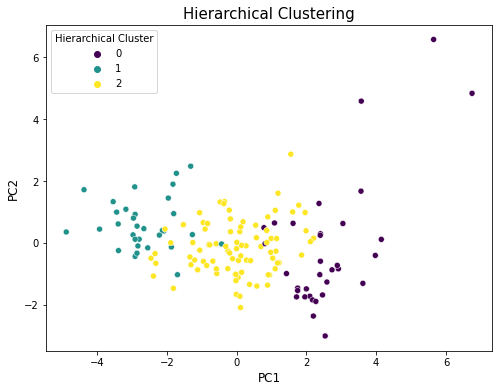

In [229]:
# Plotten die Cluster von Hierarchical Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical Cluster', data=df_reduced, palette='viridis')
plt.title("Hierarchical Clustering", fontsize=15)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.show()

Nach der Reduktion auf zwei Merkmale ist es zu sehen , dass beim hierarchischen Clustering mehr überlappende Punkte zu sehen sind als beim K-Means-Clustering. Dies kann darauf zu führen sein, dass K-Means und hierarchisches Clustering unterschiedliche Algorithmen zur Bestimmung der Clusterzugehörigkeit verwenden. Hierarchisches Clustering erzeugt eine hierarchische Struktur von Clustern, während K-Means die Punkte in diskrete Cluster partitioniert.

In [231]:
cluster_countries = pd.DataFrame({'country': country['country'], 'Hierarchical Cluster': hierarchical_labels})

# Länder im Hirarchische Cluster 1 anzeigen
cluster_1_countries = cluster_countries[cluster_countries['Hierarchical Cluster'] == 1]['country']
print("Hierarchical Cluster 1:")
print(cluster_1_countries)

Hierarchical Cluster 1:
2                        Malawi
4              Congo, Dem. Rep.
9                       Lesotho
10                      Burundi
13                   Mauritania
16                        Kenya
20                 Sierra Leone
23                      Comoros
32                   Madagascar
35                        Benin
47                     Cameroon
50                       Uganda
52                  Afghanistan
53        Micronesia, Fed. Sts.
61                        Haiti
66                       Gambia
71                       Rwanda
83                  Congo, Rep.
84                   Mozambique
91                         Chad
100                      Guinea
101                       Niger
105                      Angola
114                     Liberia
122                    Tanzania
130                    Kiribati
133                      Zambia
134               Guinea-Bissau
135                        Mali
142    Central African Republic
143             

Da Haiti und Burundi aufgrund der vorherigen Analyse und nach der Reduzierung immer noch den unterentwikelten Ländern angehört und die größte Kindersterblichkeitsrate hat, werde ich empfehlen diese beide Lander mit Spendengeldern zu unterstützen.

# please write the suggestion to CEO about the country you suggest

Sehr geehrter CEO,

Im Rahmen unserer Datenanalyse und Clusterbildung haben wir die sozioökonomischen und gesundheitlichen Faktoren mehrerer Länder untersucht, um die Kategorisierung und Bewertung ihrer Gesamtentwicklung vorzunehmen. In diesem Zusammenhang möchte ich Ihnen einen Vorschlag für die strategische Verwendung der Spendengelder für die Lander Haiti und Burundi unterbreiten.

Beide Länder wurden  in unserer Analyse als unterentwickelte Lander eingestuft.
Haiti weist hohe Raten von Kindersterblichkeit, niedrigem Bruttoinlandsprodukt (BIP) und niedrigen Gesundheitsausgaben im Verhältnis zum BIP auf. Dies deutet auf eine schwache Gesundheitsinfrastruktur und begrenzte Ressourcen für die Gesundheitsversorgung hin. Durch gezielte Investitionen könnten wir dazu beitragen, die Gesundheitsversorgung zu verbessern, den Zugang zu sauberem Wasser und sanitären Einrichtungen zu ermöglichen und Programme zur Ernährungssicherung zu unterstützen. Darüber hinaus könnten Bildungsinitiativen und die Förderung von wirtschaftlicher Entwicklung dazu beitragen, die langfristige Entwicklung des Landes zu unterstützen.

Burundi weist ebenfalls hohe Raten von Kindersterblichkeit und niedrigem BIP auf. Die Gesundheitsausgaben im Verhältnis zum BIP sind ebenfalls gering. Unsere Unterstützung könnte darauf abzielen, den Zugang zu qualitativ hochwertiger Gesundheitsversorgung zu verbessern, insbesondere für Mütter und Kinder. Wir könnten auch Programme zur Verbesserung der landwirtschaftlichen Praktiken und Ernährungssicherheit unterstützen, um die langfristige Entwicklung des Landes zu fördern. Bildungsinvestitionen könnten ebenfalls dazu beitragen, die Lebensqualität und die Zukunftschancen der Menschen in Burundi zu verbessern.

Beide Länder stehen vor erheblichen Herausforderungen in Bezug auf Gesundheit, Armutsbekämpfung und Bildung. Durch gezielte Investitionen können wir dazu beitragen, die Lebensbedingungen der Menschen in Haiti und Burundi zu verbessern und langfristige nachhaltige Veränderungen zu bewirken.

Ich stehe Ihnen gerne zur Verfügung, um weitere Informationen zu unserer Analyse und Empfehlungen zu teilen. Wir können gemeinsam die nächsten Schritte planen, um die Spendengelder effektiv und verantwortungsbewusst einzusetzen.

Vielen Dank für Ihr Vertrauen und Ihre Unterstützung.

Mit freundlichen Grüßen,
Elena Voit 
Datenwissenschaftler bei HELP International





